In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,6539370c-256e-4ed2-9d00-1be1f051163f,0,0.011716,2.442630e-03,0.350391,93.426900,4.564420,0.016044,1.628070e+00,happy
1,6539370c-256e-4ed2-9d00-1be1f051163f,1,6.587830,2.033840e-02,35.106600,0.103848,38.967200,0.001294,1.921290e+01,sad
2,6539370c-256e-4ed2-9d00-1be1f051163f,2,5.066870,7.610640e-05,1.008420,0.285020,29.728900,0.000373,6.391040e+01,neutral
3,6539370c-256e-4ed2-9d00-1be1f051163f,3,0.000539,1.678270e-05,0.041162,99.408400,0.239465,0.067905,2.425000e-01,happy
4,6539370c-256e-4ed2-9d00-1be1f051163f,4,0.000672,1.765070e-09,4.977040,0.001237,0.000022,95.021000,7.548270e-07,surprise


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null     float64
 4   fear              87 non-null     float64
 5   happy             87 non-null     float64
 6   sad               87 non-null     float64
 7   surprise          87 non-null     float64
 8   neutral           87 non-null     float64
 9   dominant_emotion  87 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.9+ KB


In [4]:
summary_stats = emotion_df.describe()
print(summary_stats)

       image_seq      angry       disgust       fear      happy        sad  \
count  87.000000  87.000000  8.700000e+01  87.000000  87.000000  87.000000   
mean   43.000000   5.641183  1.507393e-01  41.652400   8.994113  23.106425   
std    25.258662  10.851536  5.674268e-01  31.527371  24.288680  22.893766   
min     0.000000   0.000026  1.632180e-09   0.002298   0.000115   0.000022   
25%    21.500000   0.268764  4.342120e-04  12.554650   0.092540   5.145540   
50%    43.000000   1.708550  8.027740e-03  34.581800   0.293205  16.238400   
75%    64.500000   5.755515  4.025450e-02  64.482900   1.591935  35.911650   
max    86.000000  59.135600  4.551240e+00  99.750200  99.956300  91.471200   

        surprise       neutral  
count  87.000000  8.700000e+01  
mean    4.081041  1.637410e+01  
std    15.613091  2.606668e+01  
min     0.000004  7.548270e-07  
25%     0.002647  2.398415e-01  
50%     0.023693  3.981520e+00  
75%     0.295826  2.081150e+01  
max    95.021000  9.118620e+01  


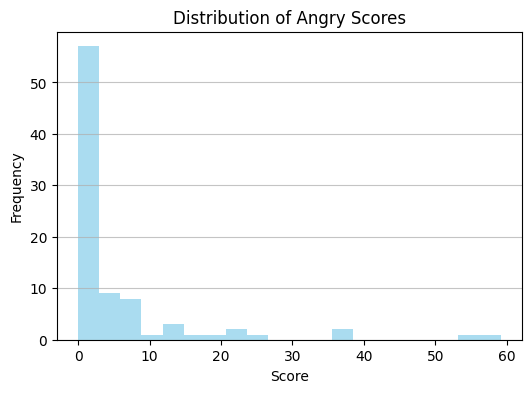

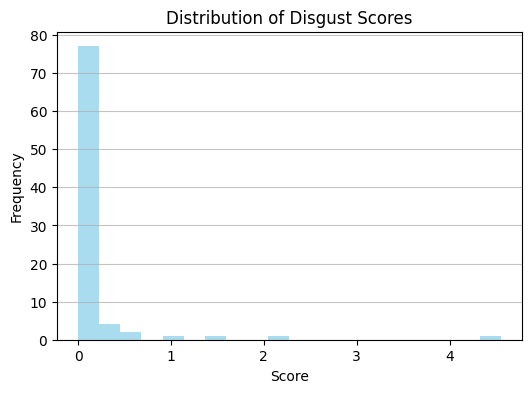

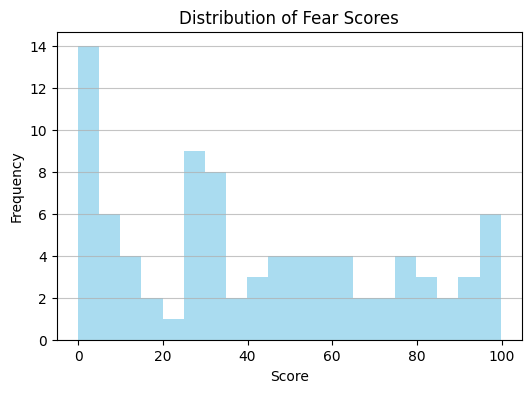

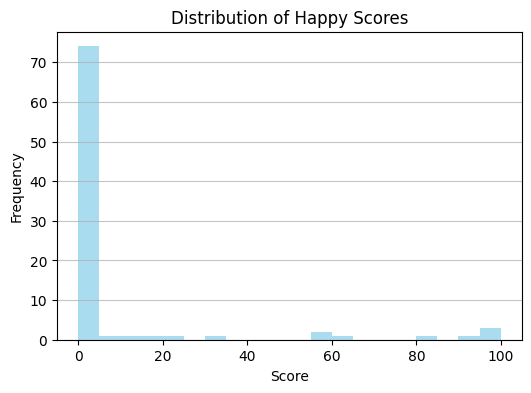

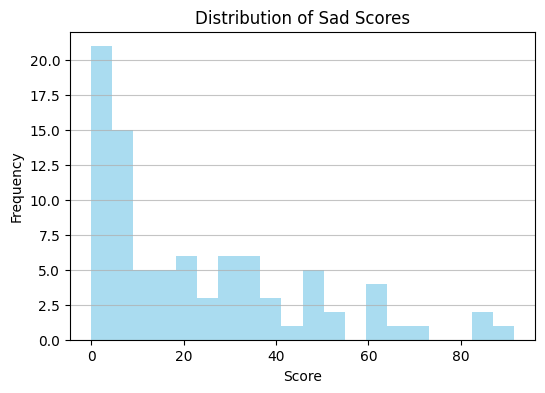

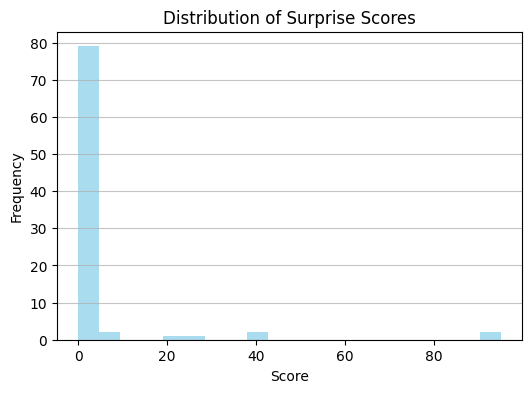

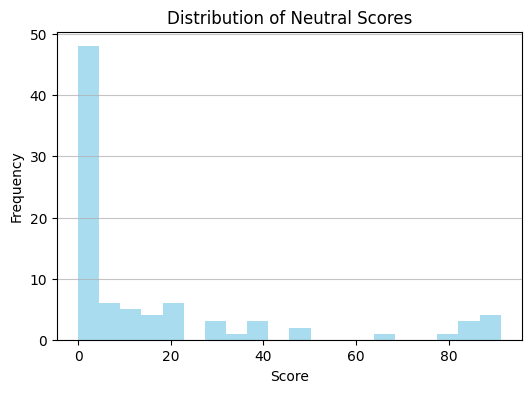

In [5]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

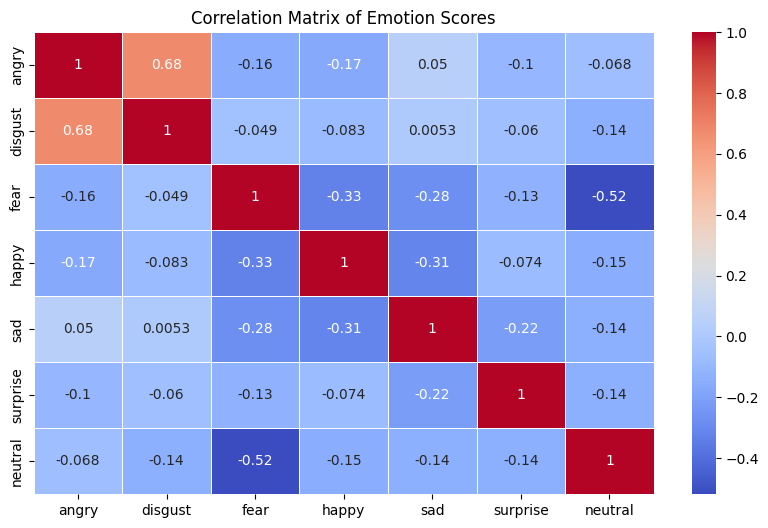

In [6]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

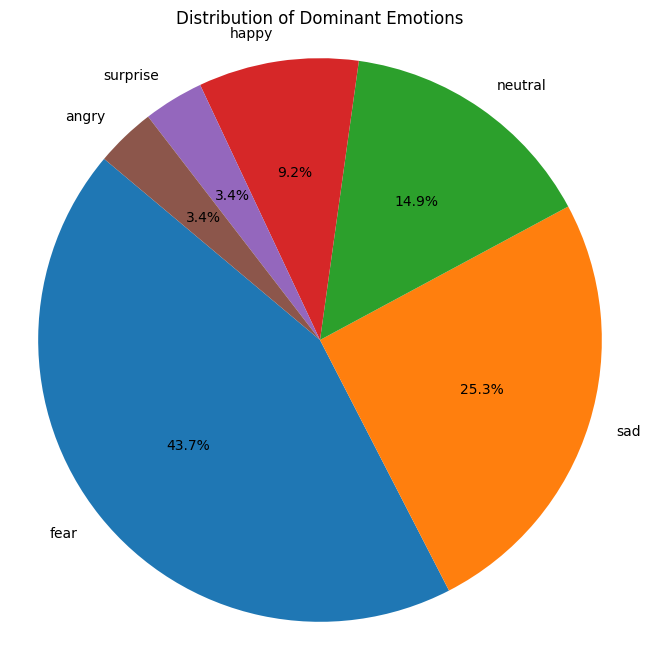

In [7]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [8]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,6539370c-256e-4ed2-9d00-1be1f051163f,1,1,1,11.9221
1,6539370c-256e-4ed2-9d00-1be1f051163f,2,1,0,13.8024
2,6539370c-256e-4ed2-9d00-1be1f051163f,3,1,0,3.0297
3,6539370c-256e-4ed2-9d00-1be1f051163f,4,1,0,-1.7059
4,6539370c-256e-4ed2-9d00-1be1f051163f,5,0,0,-35.0095


In [9]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

            gaze      blink  eye_offset
count  87.000000  87.000000   87.000000
mean    0.781609   0.218391    9.456552
std     0.415549   0.415549   25.453533
min     0.000000   0.000000  -35.804300
25%     1.000000   0.000000   -4.131100
50%     1.000000   0.000000    1.372600
75%     1.000000   0.000000   16.909500
max     1.000000   1.000000   89.774500


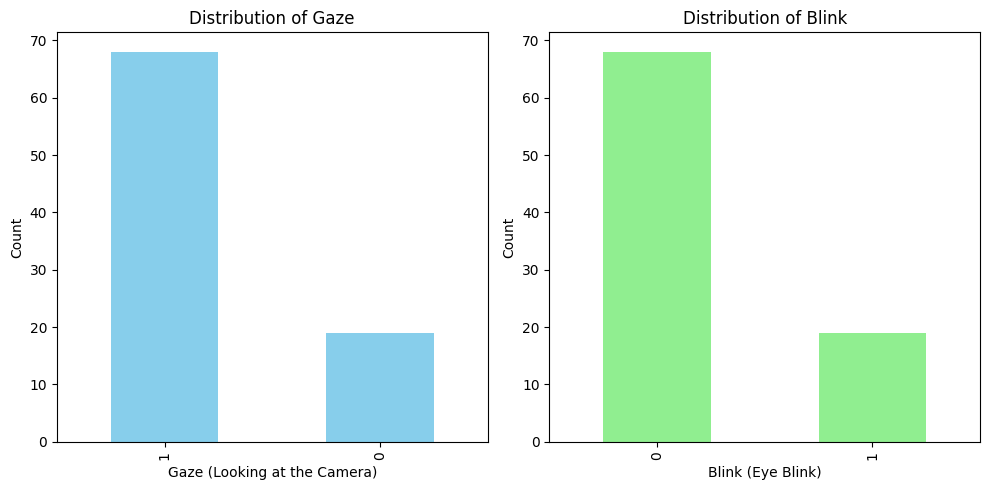

In [10]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

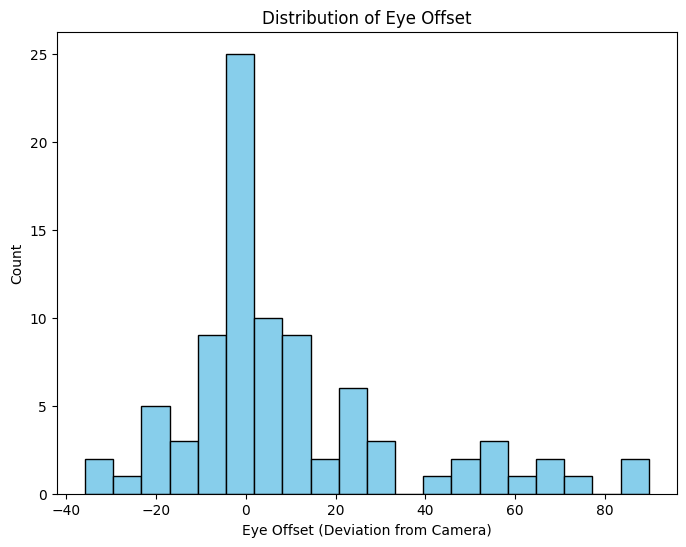

In [10]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [11]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,6539370c-256e-4ed2-9d00-1be1f051163f,1,d851fe95-3ead-47c1-88aa-d6fc453f7021,2.0,2023-09-17 07:35:59,0.0
1,6539370c-256e-4ed2-9d00-1be1f051163f,3,d851fe95-3ead-47c1-88aa-d6fc453f7021,4.0,2023-09-17 07:35:59,0.0
2,6539370c-256e-4ed2-9d00-1be1f051163f,5,d851fe95-3ead-47c1-88aa-d6fc453f7021,6.0,2023-09-17 07:35:59,0.0
3,6539370c-256e-4ed2-9d00-1be1f051163f,8,d851fe95-3ead-47c1-88aa-d6fc453f7021,9.0,2023-09-17 07:35:59,0.0
4,6539370c-256e-4ed2-9d00-1be1f051163f,9,d851fe95-3ead-47c1-88aa-d6fc453f7021,10.0,2023-09-17 07:35:59,0.0


In [14]:
metadata_df.shape

(51, 6)

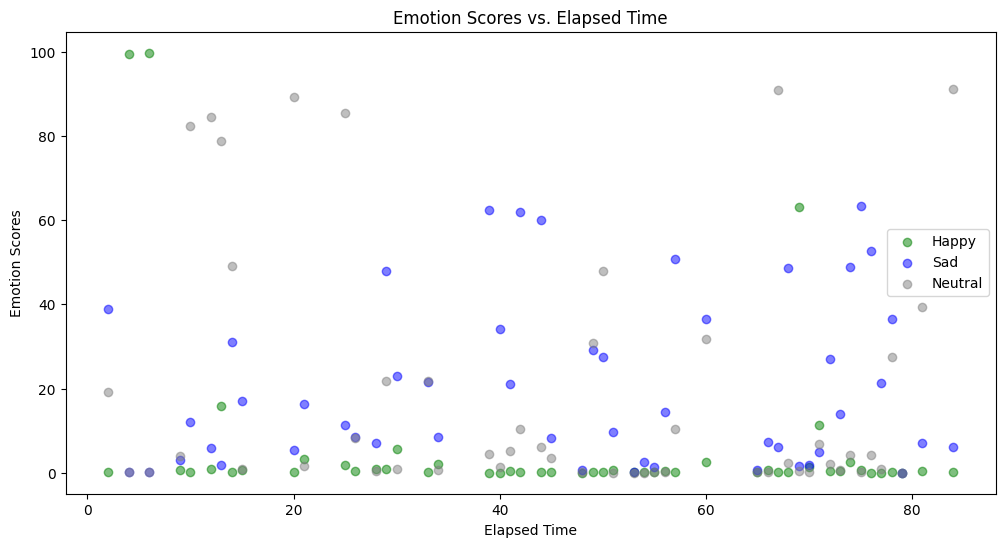

In [12]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [13]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

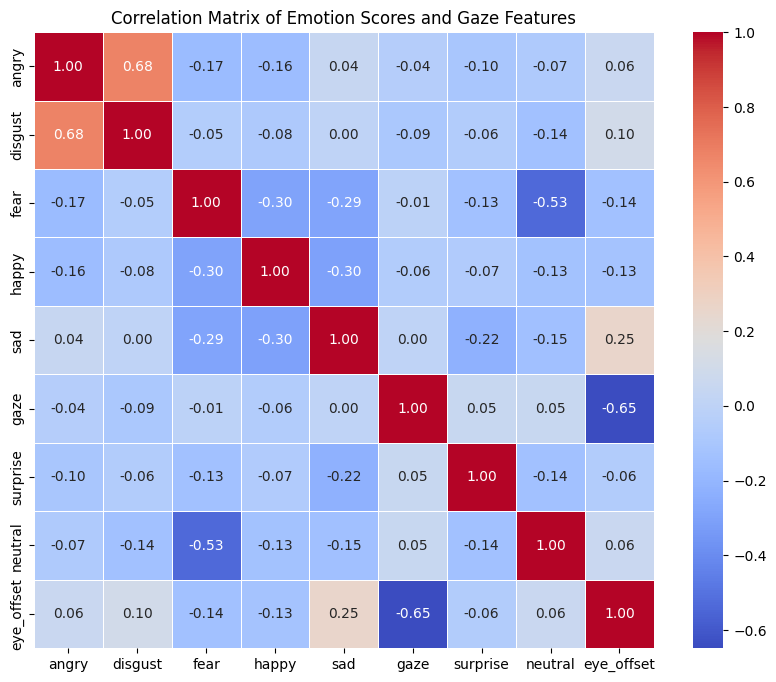

In [14]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'gaze', 'surprise', 'neutral', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [15]:
transcript_scores_df = pd.read_csv("7.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,10.08,"Hello, I am Joseph Nichols. I belong to the h...","[50364, 2425, 11, 286, 669, 1160, 265, 3016, 4...",0.0,-0.381474,1.562500,0.283158,0.520804,0.168075,0.311122,0.844285,0.916887,0.674078,0.697655,1.785714
1,1,0,10.08,16.40,in earth science from Banaras Hindu Universit...,"[50868, 294, 4120, 3497, 490, 13850, 35867, 21...",0.0,-0.381474,1.562500,0.283158,0.357795,0.230645,0.411560,0.612985,0.800743,0.438345,0.301149,2.531646
2,2,0,16.40,21.64,largest government owned reinsurer in the cou...,"[51184, 6443, 2463, 11684, 47200, 9858, 294, 2...",0.0,-0.381474,1.562500,0.283158,0.638187,0.242601,0.119212,0.810559,0.610567,0.456427,0.244825,2.099237
3,3,0,21.64,28.72,of India in their retrocession and reinsuranc...,"[51446, 295, 5282, 294, 641, 18820, 29881, 293...",0.0,-0.381474,1.562500,0.283158,0.588390,0.209222,0.202388,0.763873,0.411180,0.583936,0.331456,1.694915
4,4,2872,28.72,34.48,of the Indian markets and analytical skills a...,"[50364, 295, 264, 6427, 8383, 293, 29579, 3942...",0.0,-0.325291,1.579186,0.003822,0.779631,0.077198,0.143171,0.700540,0.265143,0.129945,0.184158,2.604167


In [16]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    0.717354   0.140232   0.142414   0.703714   0.457070   0.398571   
std     0.240184   0.155618   0.120115   0.147163   0.279431   0.233381   
min     0.277081   0.009591   0.019422   0.282490   0.020519   0.129945   
25%     0.579895   0.013389   0.033487   0.679421   0.265143   0.203513   
50%     0.779631   0.077198   0.119212   0.725499   0.571502   0.315587   
75%     0.955633   0.209222   0.202388   0.791392   0.610557   0.583936   
max     0.967672   0.559853   0.411560   0.866972   0.916887   0.829082   

       enthusiastic  speech_speed  
count     13.000000     13.000000  
mean       0.463940      2.284897  
std        0.301260      0.469236  
min        0.121832      1.694915  
25%        0.244110      1.785714  
50%        0.331456      2.343750  
75%        0.697655      2.604167  
max        0.969768      2.954545  


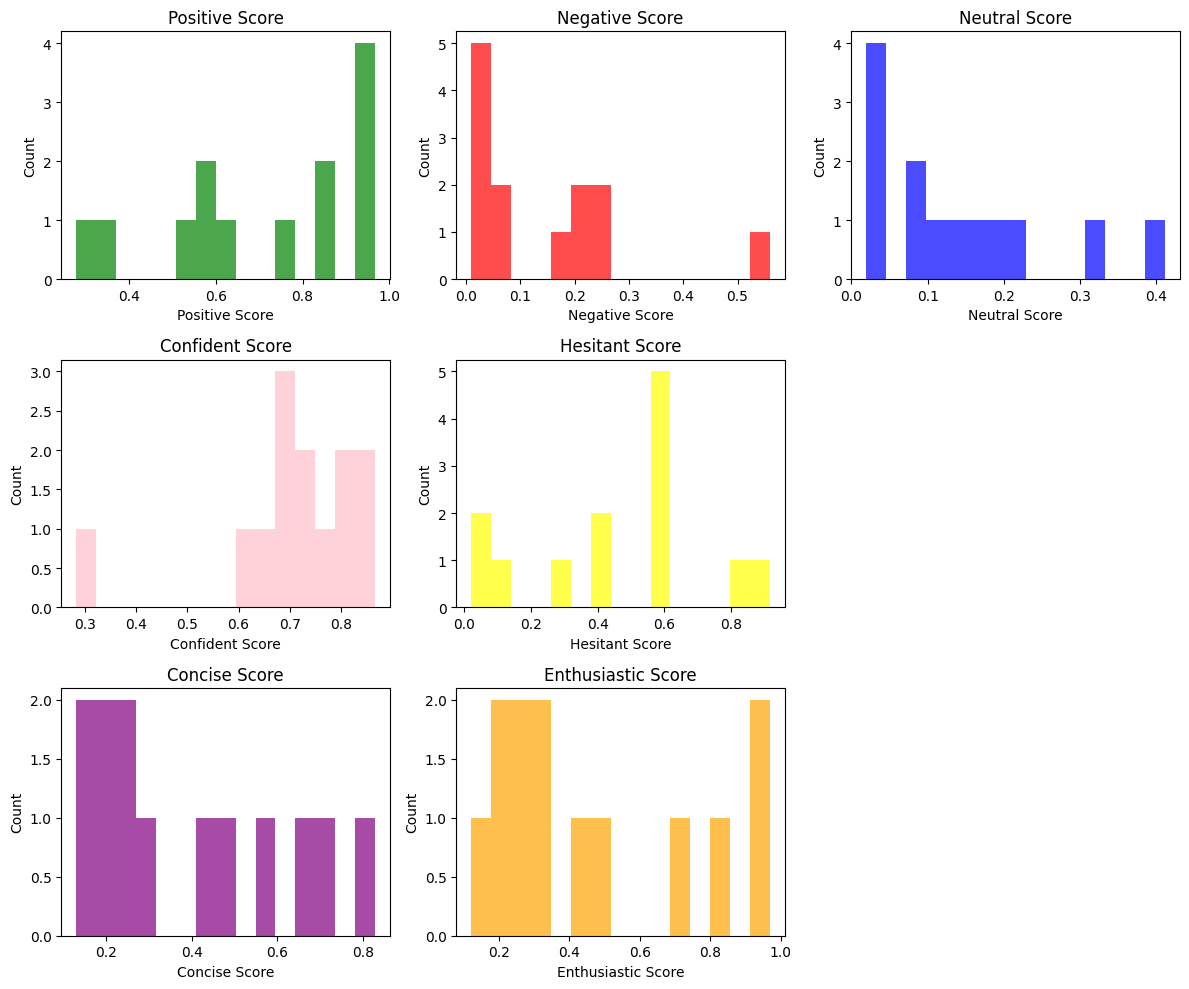

In [17]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

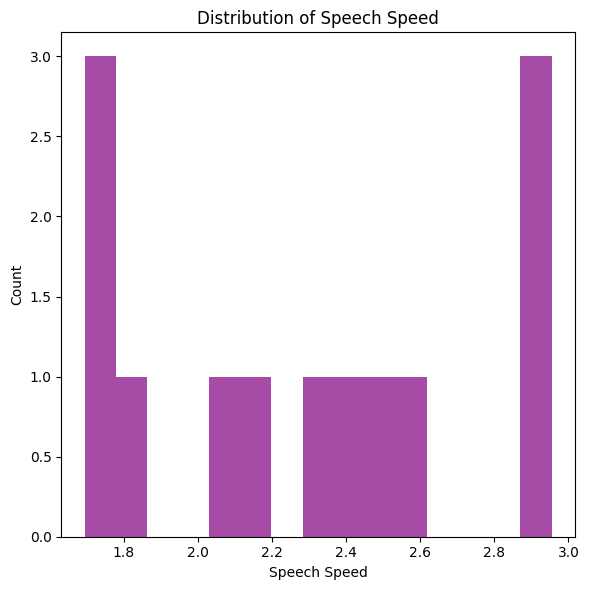

In [18]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

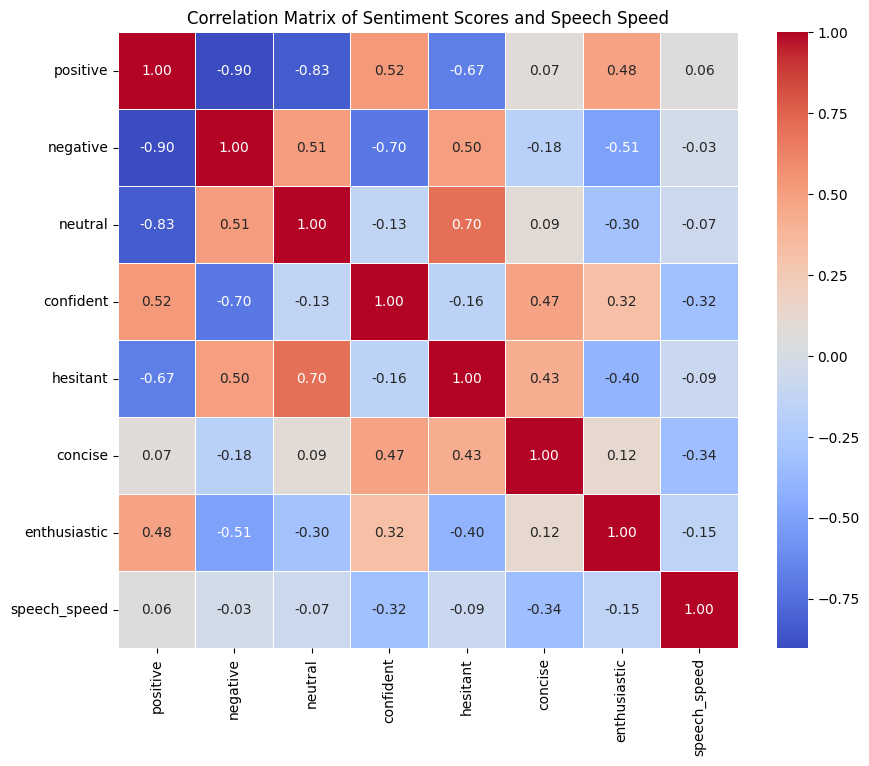

In [23]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

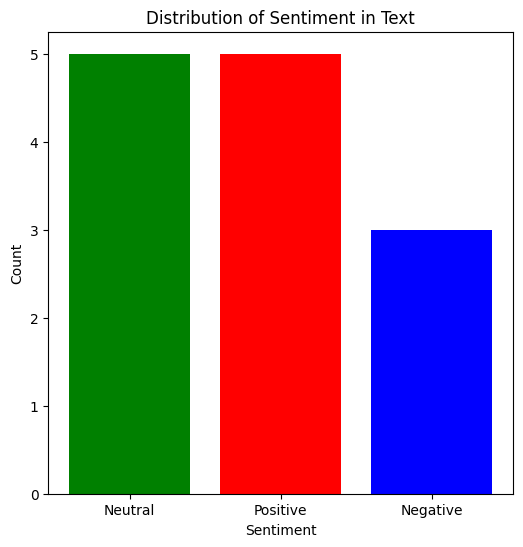

In [24]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [20]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])


                                                 text dominant_quality
0    Hello, I am Joseph Nichols. I belong to the h...         hesitant
1    in earth science from Banaras Hindu Universit...         hesitant
2    largest government owned reinsurer in the cou...        confident
3    of India in their retrocession and reinsuranc...        confident
4    of the Indian markets and analytical skills a...         positive
5    and rich field such as reinsurance, along wit...        confident
6    are the attributes which I feel make me the r...         positive
7    in the thought that you cannot find newer oce...         hesitant
8    This thought is something that pushes me each...         positive
9    While reading about your company and beside y...        confident
10   society where children can live their lives a...         positive
11   through artificial intelligence. This idea re...     enthusiastic
12                 this awakening. Thank you so much.     enthusiastic


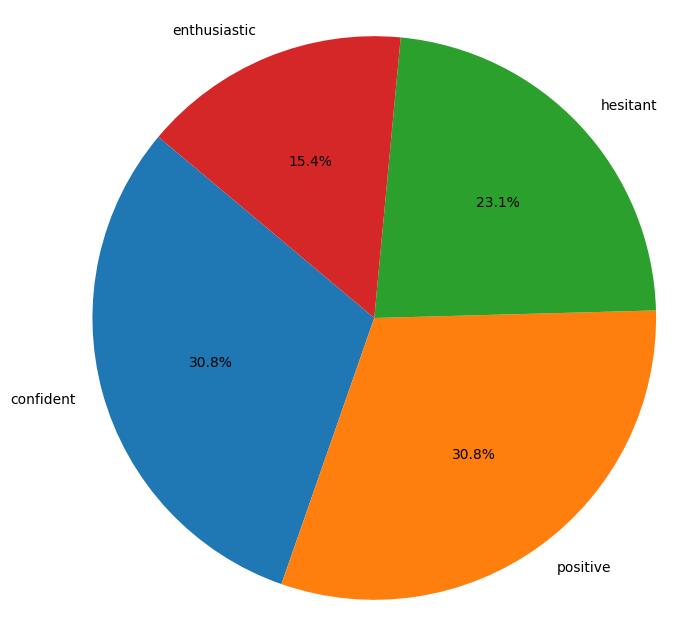

In [21]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [22]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'fear': 0.4367816091954023,
 'sad': 0.25287356321839083,
 'neutral': 0.14942528735632185,
 'happy': 0.09195402298850575,
 'surprise': 0.034482758620689655,
 'angry': 0.034482758620689655}

In [23]:
emotion_percentage_dict['disgust']=0

In [24]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [25]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: -20.816055263223262


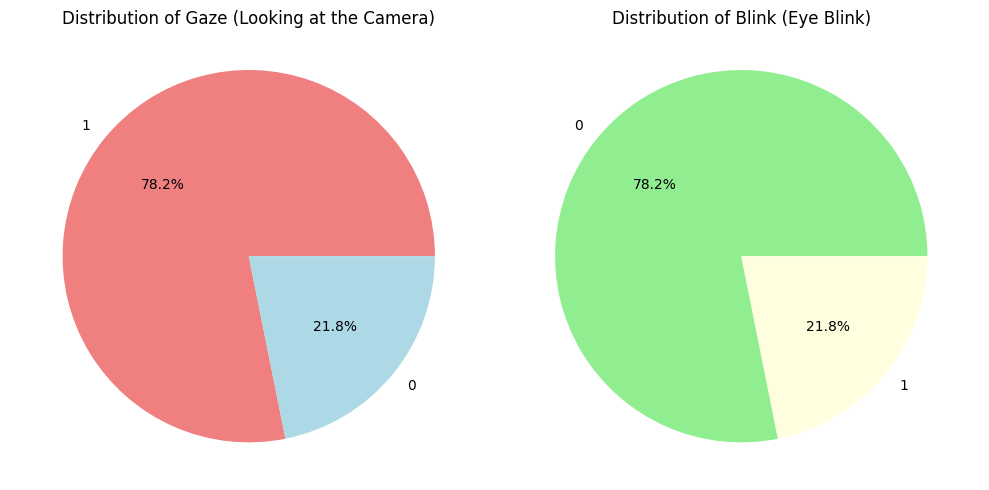

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [27]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [28]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [29]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.41604368454661567

In [30]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'confident': 0.3076923076923077,
 'positive': 0.3076923076923077,
 'hesitant': 0.23076923076923078,
 'enthusiastic': 0.15384615384615385}

In [31]:
sentiment_percentage_dict['concise']=0
sentiment_percentage_dict['neutral']=0
sentiment_percentage_dict['negative']=0
sentiment_percentage_dict

{'confident': 0.3076923076923077,
 'positive': 0.3076923076923077,
 'hesitant': 0.23076923076923078,
 'enthusiastic': 0.15384615384615385,
 'concise': 0,
 'neutral': 0,
 'negative': 0}

In [32]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [33]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

0.4031493130343905

In [34]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [35]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 1.2151028517270739


In [36]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

-11.125091558790604